In [1]:
from cProfile import label
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data
name = pd.read_excel("short_data.xlsx", sheet_name="Name", index_col=0)     # 8208 cells
public_date = pd.read_excel("short_data.xlsx", sheet_name="Public Date", index_col=0, parse_dates=True)     
ocf = pd.read_excel("short_data.xlsx", sheet_name="OCF", index_col=0)   # 1113 missing values   86%
roa = pd.read_excel("short_data.xlsx", sheet_name="ROA", index_col=0)   # 1424    83%
ta = pd.read_excel("short_data.xlsx", sheet_name="TA", index_col=0)   # 1115   86%
mv = pd.read_excel("short_data.xlsx", sheet_name="MV", index_col=0)   # 1795    78%
total_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Lia", index_col=0)    # 1114    86%
sales = pd.read_excel("short_data.xlsx", sheet_name="Sales", index_col=0)   # 1104    87%
tangible_FA = pd.read_excel("short_data.xlsx", sheet_name="Tangible FA", index_col=0)   # 1124    86%
total_ca = pd.read_excel("short_data.xlsx", sheet_name="Total CA", index_col=0)   # 1114    86%
current_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Current Lia", index_col=0)   # 1114    86%
fixed_assets = pd.read_excel("short_data.xlsx", sheet_name="Fixed assets", index_col=0)
accounts_receivable = pd.read_excel("short_data.xlsx", sheet_name="Accounts Receivable", index_col=0)
costs_of_revenue = pd.read_excel("short_data.xlsx", sheet_name="Costs of revenue", index_col=0)
ebit = pd.read_excel("short_data.xlsx", sheet_name="EBIT", index_col=0)
eps = pd.read_excel("short_data.xlsx", sheet_name="EPS", index_col=0)
equity = pd.read_excel("short_data.xlsx", sheet_name="Equity", index_col=0)
avg_receivable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Receivable days", index_col=0)
avg_payable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Payable days", index_col=0)
avg_inventory_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Inventory days", index_col=0)
# Biến vĩ mô
gdp = pd.read_excel("short_data.xlsx", sheet_name="GDP", index_col=0)
cpi = pd.read_excel("short_data.xlsx", sheet_name="CPI", index_col=0)
interest_rates = pd.read_excel("short_data.xlsx", sheet_name="Interest rates", index_col=0)

In [3]:
# Drop companies are established under 5 years
com_under5years = []
for i in name.index:
  if int(public_date.loc[i,'Date Became Public'].strftime('%Y')) > 2015:
    com_under5years.append(i)      
print(len(com_under5years))  # 168 companies are established under 5 years.

name.drop(com_under5years,axis='index', inplace=True)   # 516 remained companies
ocf.drop(com_under5years,axis='columns', inplace=True)
roa.drop(com_under5years,axis='columns', inplace=True)
ta.drop(com_under5years,axis='columns', inplace=True)
mv.drop(com_under5years,axis='columns', inplace=True)
total_lia.drop(com_under5years,axis='columns', inplace=True)
sales.drop(com_under5years,axis='columns', inplace=True)
tangible_FA.drop(com_under5years,axis='columns', inplace=True)
total_ca.drop(com_under5years,axis='columns', inplace=True)
current_lia.drop(com_under5years,axis='columns', inplace=True)
fixed_assets.drop(com_under5years,axis='columns', inplace=True)
accounts_receivable.drop(com_under5years,axis='columns', inplace=True)
costs_of_revenue.drop(com_under5years,axis='columns', inplace=True)
ebit.drop(com_under5years,axis='columns', inplace=True)
eps.drop(com_under5years,axis='columns', inplace=True)
equity.drop(com_under5years,axis='columns', inplace=True)
avg_receivable_days.drop(com_under5years,axis='columns', inplace=True)
avg_payable_days.drop(com_under5years,axis='columns', inplace=True)
avg_inventory_days.drop(com_under5years,axis='columns', inplace=True)
gdp.drop(com_under5years,axis='columns', inplace=True)
cpi.drop(com_under5years,axis='columns', inplace=True)
interest_rates.drop(com_under5years,axis='columns', inplace=True)
public_date = public_date.loc[name.index, :]

public_date.shape

industry = name['TRBC Economic Sector Name'].value_counts().index.tolist()

168


Select Industry

In [4]:
# Energy
# name_industry = 'Basic Materials'
# name_industry = 'Consumer Cyclicals'
# name_industry = 'Consumer Non-Cyclicals'
# name_industry = 'Energy'
# name_industry = 'Healthcare'
name_industry = 'Industrials'
# name_industry = 'Real Estate'
# name_industry = 'Technology'
# name_industry = 'Utilities'

for i in name.index:
  if name_industry not in name["TRBC Economic Sector Name"][i]:
    name = name.drop(labels=i, axis=0)
    public_date = public_date.drop(labels=i, axis=0)

In [5]:
def drop_company(data, name):
  for i in data.columns:
    if i not in name.index:
      del data[i]
  return data

ocf = drop_company(ocf, name)
roa = drop_company(roa, name)
ta = drop_company(ta, name)
mv = drop_company(mv, name)
total_lia = drop_company(total_lia, name)
sales = drop_company(sales, name)
tangible_FA = drop_company(tangible_FA, name)
total_ca = drop_company(total_ca, name)
current_lia = drop_company(current_lia, name)
fixed_assets = drop_company(fixed_assets, name)
accounts_receivable = drop_company(accounts_receivable, name)
costs_of_revenue = drop_company(costs_of_revenue, name)
ebit = drop_company(ebit, name)
eps = drop_company(eps, name)
equity = drop_company(equity, name)
avg_receivable_days = drop_company(avg_receivable_days, name)
avg_payable_days = drop_company(avg_payable_days, name)
avg_inventory_days = drop_company(avg_inventory_days, name)
gdp = drop_company(gdp, name)
cpi = drop_company(cpi, name)
interest_rates = drop_company(interest_rates, name)


In [6]:
# Fill Avg. Inventory days

# Cách 1: For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value.

avg_inventory_days = avg_inventory_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_inventory_days.isnull().sum().sum())   # 48 (VNF.HN, VNT.HN, VNL.HM, TVC.HN bị NaN nguyên cột)

# Fill Avg. Payable days

avg_payable_days = avg_payable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_payable_days.isnull().sum().sum())   # 0

# Fill Avg. Receivable days

avg_receivable_days = avg_receivable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_receivable_days.isnull().sum().sum())  # 0

# Fill Equity

equity = equity.interpolate(method='linear', limit_direction='both', axis=0)
print(equity.isnull().sum().sum()) 

# Fill Fixed Assets

fixed_assets = fixed_assets.interpolate(method='linear', limit_direction='both', axis=0)
print(fixed_assets.isnull().sum().sum()) 

# Fill EBIT

ebit = ebit.interpolate(method='linear', limit_direction='both', axis=0)
print(ebit.isnull().sum().sum()) 

# Fill cost of revenue

costs_of_revenue = costs_of_revenue.interpolate(method='linear', limit_direction='both', axis=0)
print(costs_of_revenue.isnull().sum().sum()) 

# Fill A.R

accounts_receivable = accounts_receivable.interpolate(method='linear', limit_direction='both', axis=0)
print(accounts_receivable.isnull().sum().sum()) 

48
0
0
0
0
0
0
0


In [7]:
def detect_nan(data):
  nan_values = data.isna()
  nan_columns = nan_values.any()
  columns_with_nan = data.columns[nan_columns].tolist()
  return (columns_with_nan)

detect_nan(avg_inventory_days)


def fix_negative(data):
  for j in range(data.shape[1]):
    for i in range(data.shape[0]):
      if data.iloc[i,j] < 0:
        data.iloc[i,j] = 0-data.iloc[i,j]

fix_negative(costs_of_revenue)
fix_negative(accounts_receivable)
fix_negative(avg_inventory_days)
fix_negative(avg_receivable_days)
fix_negative(avg_payable_days)

In [8]:
# Calculate NI
ni = roa * ta

# Calculate Size
size = np.log(mv)

# Calculate Leverage
lev = total_lia / ta

# Calculate PPE
ppe = tangible_FA / sales

# Calculate Liquidity
liq = total_ca / current_lia

# Calculate Growth                                            (based on 2010-2020)
growth = sales.pct_change(periods=1)
growth.drop(growth.index[0], axis='index', inplace=True)

# Calculate Inv turnover ratio
inv_turnover = 365 / avg_inventory_days

# Calculate Inv
inv = sales/inv_turnover

# Calculate Quick ratio
quick = (total_ca - inv) / current_lia

# Calculate FA turnover ratio 
fa_turnover = sales / fixed_assets

# Calculate TA turnover ratio 
ta_turnover = sales / ta

# Calculate DSO
dso = accounts_receivable / (sales / 365)

# Calculate Capital intensity
capital_intensity = ta / sales

# Calculate Expense revenue ratio
expense_revenue = costs_of_revenue / sales

# Calculate Operating margin
operating_margin = ebit / sales

# Calculate Net profit margin
net_profit_margin = ni / sales

# Calculate BEP
bep = ebit / ta

# Calculate ROE
roe = ni / equity

# Calculate growth of CCC
ccc = avg_inventory_days + avg_receivable_days - avg_payable_days

# Drop year 2009
ni.drop(ni.index[0], axis='index', inplace=True)   
ocf.drop(ocf.index[0], axis='index', inplace=True)   
size.drop(size.index[0], axis='index', inplace=True)   
lev.drop(lev.index[0], axis='index', inplace=True)   
ppe.drop(ppe.index[0], axis='index', inplace=True)   
liq.drop(liq.index[0], axis='index', inplace=True)  
inv_turnover.drop(inv_turnover.index[0], axis='index', inplace=True) 
quick.drop(quick.index[0], axis='index', inplace=True) 
fa_turnover.drop(fa_turnover.index[0], axis='index', inplace=True) 
ta_turnover.drop(ta_turnover.index[0], axis='index', inplace=True) 
dso.drop(dso.index[0], axis='index', inplace=True) 
capital_intensity.drop(capital_intensity.index[0], axis='index', inplace=True) 
expense_revenue.drop(expense_revenue.index[0], axis='index', inplace=True) 
operating_margin.drop(operating_margin.index[0], axis='index', inplace=True) 
net_profit_margin.drop(net_profit_margin.index[0], axis='index', inplace=True) 
bep.drop(bep.index[0], axis='index', inplace=True) 
roe.drop(roe.index[0], axis='index', inplace=True) 
roa.drop(roa.index[0], axis='index', inplace=True) 
eps.drop(eps.index[0], axis='index', inplace=True) 
ccc.drop(ccc.index[0], axis='index', inplace=True) 
gdp.drop(gdp.index[0], axis='index', inplace=True)  
cpi.drop(cpi.index[0], axis='index', inplace=True)  
interest_rates.drop(interest_rates.index[0], axis='index', inplace=True)  

# Calculate Age of companies
ind = list(range(2010, 2021))
col = size.columns
age = pd.DataFrame(columns=size.columns)

for i in ind:
  list_year = []
  for j in size.columns:
    num = i - public_date.loc[j,'Organization Founded Year']
    list_year.append(num)
  age_length = len(age)
  age.loc[age_length] = list_year
age.index = size.index

age = age.replace(list(range(-5,0)), np.NaN)

In [9]:
cols=[]
for j in range(len(total_ca.columns)):
  for i in range(len(total_ca.index)):
    if total_ca.iloc[i,j] < inv.iloc[i,j]:
      cols.append(total_ca.columns[j])
      break
print(len(cols))

cols=[]
for j in range(len(ebit.columns)):
  for i in range(len(ebit.index)):
    if sales.iloc[i,j] < ebit.iloc[i,j]:
      cols.append(ebit.columns[j])
      break
print(len(cols))

cols=[]
for j in range(len(ni.columns)):
  for i in range(len(ni.index)):
    if sales.iloc[i,j] < ni.iloc[i,j]:
      cols.append(ni.columns[j])
      break
print(len(cols))


45
26
15


In [10]:
# NI > 0 & OCF > 0 --> Nhóm profit (có lợi nhuận ròng và lợi nhuận từ hoạt động kd)
# NI<= 0 & OCF <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)
quantity = name.shape[0]
target = pd.DataFrame(np.random.randn(11, quantity), columns=size.columns, index = size.index)
for i in range(len(size.index)):
  for j in range(len(size.columns)):
    if ni.iloc[i,j] > 0 and ocf.iloc[i,j] > 0:
      target.iloc[i,j] = 1
    else:
      target.iloc[i,j] = 0
print(target.to_string())


      V21.HN  LIG.HN  VCM.HN  CX8.HN  HU1.HM  AME.HN  PDN.HM  PXI.HM  VE3.HN  BCE.HM  UDC.HM  LCS.HN  HHG.HN  VE2.HN  HMH.HN  PCT.HN  CVN.HN  WCS.HN  VOS.HM  SMA.HM  ARM.HN  KTT.HN  LM7.HN  LM8.HM  LCD.HN  PRC.HN  CMS.HN  VNF.HN  VAT.HN  HTI.HM  VSI.HM  ADC.HN  KST.HN  MDG.HM  PTD.HN  TSB.HN  C47.HM  DIH.HN  INC.HN  SVN.HN  L14.HN  PPE.HN  CTX.HN  FCN.HM  VE8.HN  VE4.HN  EMC.HM  DHP.HN  NDX.HN  KSQ.HN  CLL.HM  SKG.HM  TVC.HN  PEN.HN  AMD.HM  NCT.HM  HAH.HM  FID.HN  BCG.HM  PHP.HN  TA9.HN  VMS.HN  VSA.HN  SDT.HN  SJE.HN  HTP.HN  L18.HN  DXP.HN  GMD.HM  HTV.HM  HAS.HM  MHC.HM  CII.HM  REE.HM  TMS.HM  TYA.HM  RAL.HM  LGC.HM  SFI.HM  VGP.HN  SDC.HN  SDA.HN  S55.HN  PAC.HM  HBC.HM  SC5.HM  VNE.HM  C92.HN  VC6.HN  DQC.HM  PIT.HM  TJC.HN  L10.HM  VC7.HN  SD2.HN  HUT.HN  LUT.HN  VSC.HM  L62.HN  CJC.HN  CTB.HN  VC2.HN  TPH.HN  MCO.HN  SD9.HN  SIC.HN  SD5.HN  PTC.HM  VMC.HN  VNC.HN  SD6.HN  S99.HN  L43.HN  SD4.HN  TV4.HN  VNS.HM  VE1.HN  SSM.HN  L61.HN  QTC.HN  VCC.HN  ICG.HN  VC1.HN  DZM.HN  VN

In [11]:
data = pd.DataFrame()
data['Size'] = size.values.flatten()
data['Leverage'] = lev.values.flatten()
data['Growth'] = growth.values.flatten()
data['PPE'] = ppe.values.flatten()
data['Liquidity'] = liq.values.flatten()
data['Age'] = age.values.flatten()
data['Quick ratio'] = quick.values.flatten()
data['Inventory turnover ratio'] = inv_turnover.values.flatten()
data['FA turnover ratio'] = fa_turnover.values.flatten()
data['TA turnover ratio'] = ta_turnover.values.flatten()
data['DSO'] = dso.values.flatten()
data['Capital intensity'] = capital_intensity.values.flatten()
data['Expense of revenue ratio'] = expense_revenue.values.flatten()
data['Operating margin'] = operating_margin.values.flatten()
data['Net profit margin'] = net_profit_margin.values.flatten()
data['ROA'] = roa.values.flatten()
data['ROE'] = roe.values.flatten()
data['EPS'] = eps.values.flatten()
data['BEP'] = bep.values.flatten()
data['CCC'] = ccc.values.flatten()
data['GDP'] = gdp.values.flatten()
data['CPI'] = cpi.values.flatten()
data['Interest rates'] = interest_rates.values.flatten()
data['Target'] = target.values.flatten()

# Set up multi index
year = np.arange(2010,2021)
com = list(size.columns)

index = pd.MultiIndex.from_product([year, com],
                           names=['Year', 'Company'])
data.index = index
print(data.shape)
data

(1672, 24)


Size  Leverage    Growth       PPE  Liquidity   Age  \
Year Company                                                             
2010 V21.HN   24.511991  0.909509  0.728948  0.044329   1.194372   5.0   
     LIG.HN   26.171438  0.810075  0.669013  0.281770   1.406351  14.0   
     VCM.HN   25.060557  0.743280  6.055509  0.052265   1.583821   3.0   
     CX8.HN   24.233655  0.803536 -0.195421  0.025594   1.163064   7.0   
     HU1.HM   26.036472  0.825987  0.015876  0.008693   1.307671   6.0   
...                 ...       ...       ...       ...        ...   ...   
2020 CTI.HM   27.467796  0.754028  0.148433  1.667962   0.988385  20.0   
     APC.HM   26.904714  0.367607 -0.009390  4.826876   5.733834  17.0   
     CKV.HN   24.528469  0.470359  0.105777  0.081857   1.323543  24.0   
     QHD.HN   25.833695  0.272181  0.137252  0.132517   2.569365  12.0   
     L35.HN   23.778375  0.824229 -0.108642  0.076029   1.076945  24.0   

              Quick ratio  Inventory turnover ratio  FA turnover ratio  \
Year Company                                                             
2010 V21.HN      0.274740                  1.559963          19.697700   
     LIG.HN      0.945083                  3.843361           0.512498   
     VCM.HN      1.504757                 25.264426          13.632941   
     CX8.HN      1.075345                 10.962770          98.726654   
     HU1.HM      1.132285                  6.043071           2.089397   
...                   ...                       ...                ...   
2020 CTI.HM      0.399579                  2.305516           7.283466   
     APC.HM      5.717545                245.683504           2.147777   
     CKV.HN     -0.147972                  3.990343          19.833739   
     QHD.HN      1.079523                  5.105402          11.244089   
     L35.HN      0.968429                  6.063711           4.757727   

              TA turnover ratio  ...  Net profit margin       ROA       ROE  \
Year Company                     ...                                          
2010 V21.HN            1.132611  ...           0.023508  0.026625  0.105786   
     LIG.HN            0.895913  ...           0.055030  0.049302  0.094235   
     VCM.HN            0.980097  ...           0.102776  0.100730  0.371378   
     CX8.HN            0.752364  ...           0.027005  0.020318  0.102555   
     HU1.HM            0.770835  ...           0.027952  0.021546  0.122324   
...                         ...  ...                ...       ...       ...   
2020 CTI.HM            0.201902  ...           0.110804  0.022371  0.512741   
     APC.HM            0.140281  ...           0.319715  0.044850  0.382291   
     CKV.HN            2.736950  ...           0.000949  0.002596  0.005464   
     QHD.HN            2.070276  ...           0.114822  0.237713  0.728055   
     L35.HN            0.534378  ...          -0.086344 -0.046141 -0.218611   

                     EPS       BEP         CCC       GDP       CPI  \
Year Company                                                         
2010 V21.HN     47.71981  0.042902  272.146430  6.423238  9.207466   
     LIG.HN    408.74185  0.145285  165.069488  6.423238  9.207466   
     VCM.HN   2645.10008  0.027980   52.717168  6.423238  9.207466   
     CX8.HN    293.83187  0.009302  233.272982  6.423238  9.207466   
     HU1.HM    651.58241  0.017338  245.347261  6.423238  9.207466   
...                  ...       ...         ...       ...       ...   
2020 CTI.HM   2438.06252  0.015288  184.947956  2.905836  3.220934   
     APC.HM   2871.55143  0.029465    3.992812  2.905836  3.220934   
     CKV.HN   1150.01520  0.035319 -309.251264  2.905836  3.220934   
     QHD.HN   4907.41985  0.222003   50.409879  2.905836  3.220934   
     L35.HN   1937.35598  0.036818  151.202992  2.905836  3.220934   

              Interest rates  Target  
Year Company                          
2010 V21.HN         0.946653     0.0  
     LIG.HN         0.946653     0.0 

In [12]:
data.dtypes

Size                        float64
Leverage                    float64
Growth                      float64
PPE                         float64
Liquidity                   float64
Age                         float64
Quick ratio                 float64
Inventory turnover ratio    float64
FA turnover ratio           float64
TA turnover ratio           float64
DSO                         float64
Capital intensity           float64
Expense of revenue ratio    float64
Operating margin            float64
Net profit margin           float64
ROA                         float64
ROE                         float64
EPS                         float64
BEP                         float64
CCC                         float64
GDP                         float64
CPI                         float64
Interest rates              float64
Target                      float64
dtype: object

In [13]:
data.describe()

,Size,Leverage,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,...,Net profit margin,ROA,ROE,EPS,BEP,CCC,GDP,CPI,Interest rates,Target
count,1584.000000,1625.000000,1607.000000,1615.000000,1625.000000,1669.000000,1582.000000,1.628000e+03,1625.000000,1623.000000,...,1597.000000,1599.000000,1599.000000,1604.000000,1625.000000,1628.000000,1672.000000,1672.000000,1672.000000,1672.000000
mean,25.598426,0.561116,0.448357,0.527258,2.422534,15.088676,1.665874,1.137586e+04,61.131986,0.903503,...,0.157398,0.052288,0.376885,1776.714680,0.077781,773.662012,6.001623,5.821202,3.797918,0.579545
std,1.536242,0.229834,4.255540,1.131647,7.522331,8.284396,9.421337,2.345899e+05,482.356217,0.681964,...,3.316432,0.081110,4.533394,2584.881747,0.131343,14119.077321,1.131298,4.810290,2.944813,0.493780
min,21.917188,0.004032,-0.997369,0.000000,0.097129,0.000000,-233.622701,7.903295e-03,0.004599,0.000379,...,-29.283665,-0.369709,-1.557769,-9727.705130,-0.556457,-6519.856273,2.905836,0.631201,-3.551709,0.000000
25%,24.569149,0.393562,-0.120141,0.072409,1.108808,9.000000,0.596980,2.224597e+00,1.916329,0.468413,...,0.013936,0.010065,0.035636,445.051283,0.017572,60.397125,5.421883,2.795824,2.294892,0.000000
50%,25.530852,0.603427,0.072588,0.177311,1.350896,14.000000,0.948661,4.610812e+00,5.915814,0.742405,...,0.039961,0.032879,0.099046,1349.413540,0.045961,152.695853,6.240303,3.539628,4.825874,1.000000
75%,26.521661,0.748929,0.261643,0.458577,1.905768,19.000000,1.459089,1.557600e+01,14.783666,1.154189,...,0.098157,0.078189,0.187306,2471.796377,0.090089,271.797815,6.812246,9.094703,5.814896,1.000000
max,30.483757,0.983578,127.457886,14.121224,242.577244,60.000000,242.109751,8.775515e+06,10893.259284,6.531007,...,122.490907,0.839056,162.338138,24592.512910,1.292267,516652.621870,7.075789,18.677732,7.322258,1.000000


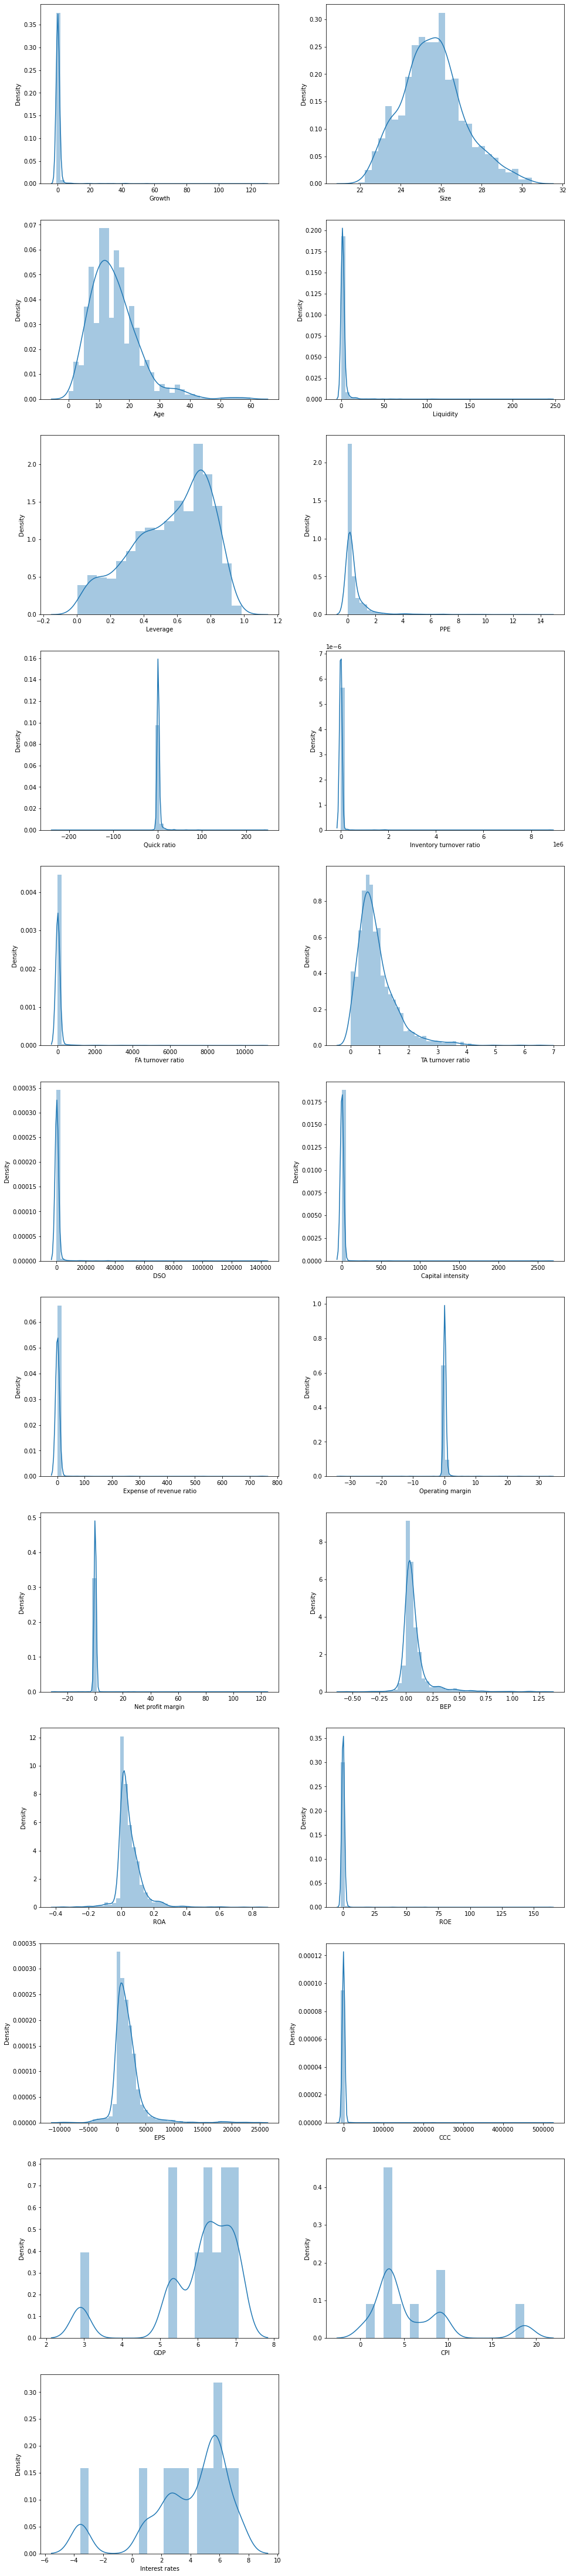

In [14]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(12,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity', 'Leverage', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'Net profit margin', 'BEP', 'ROA', 'ROE', 'EPS', 'CCC', 'GDP', 'CPI', 'Interest rates'])

In [15]:
name = ['Growth', 'PPE', 'Liquidity', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'Net profit margin', 'ROE', 'CCC']
def capping(df):
  upper_limit = df[name].mean() + 3*df[name].std()
  lower_limit = df[name].mean() - 3*df[name].std()
  for i in name:
    df[name] = np.where(
      df[name]>upper_limit,
      upper_limit,
      np.where(
          df[name]<lower_limit,
          lower_limit,
          df[name]
      )
  )

capping(data)
data.describe()

,Size,Leverage,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,...,Net profit margin,ROA,ROE,EPS,BEP,CCC,GDP,CPI,Interest rates,Target
count,1584.000000,1625.000000,1607.000000,1615.000000,1625.000000,1669.000000,1582.000000,1628.000000,1625.000000,1623.000000,...,1597.000000,1599.000000,1599.000000,1604.000000,1625.000000,1628.000000,1672.000000,1672.000000,1672.000000,1672.000000
mean,25.598426,0.561116,0.255721,0.467632,2.146398,15.088676,1.584767,3948.183366,36.590890,0.903503,...,0.081109,0.052288,0.230369,1776.714680,0.077781,346.676502,6.001623,5.821202,3.797918,0.579545
std,1.536242,0.229834,1.329318,0.761910,2.900046,8.284396,3.244638,44652.697865,162.002351,0.681964,...,0.674809,0.081110,0.871488,2584.881747,0.131343,2043.235527,1.131298,4.810290,2.944813,0.493780
min,21.917188,0.004032,-0.997369,0.000000,0.097129,0.000000,-26.598137,0.007903,0.004599,0.000379,...,-9.791897,-0.369709,-1.557769,-9727.705130,-0.556457,-6519.856273,2.905836,0.631201,-3.551709,0.000000
25%,24.569149,0.393562,-0.120141,0.072409,1.108808,9.000000,0.596980,2.224597,1.916329,0.468413,...,0.013936,0.010065,0.035636,445.051283,0.017572,60.397125,5.421883,2.795824,2.294892,0.000000
50%,25.530852,0.603427,0.072588,0.177311,1.350896,14.000000,0.948661,4.610812,5.915814,0.742405,...,0.039961,0.032879,0.099046,1349.413540,0.045961,152.695853,6.240303,3.539628,4.825874,1.000000
75%,26.521661,0.748929,0.261643,0.458577,1.905768,19.000000,1.459089,15.576000,14.783666,1.154189,...,0.098157,0.078189,0.187306,2471.796377,0.090089,271.797815,6.812246,9.094703,5.814896,1.000000
max,30.483757,0.983578,13.214978,3.922197,24.989526,60.000000,29.929886,715145.589600,1508.200638,6.531007,...,10.106694,0.839056,13.977066,24592.512910,1.292267,43130.893975,7.075789,18.677732,7.322258,1.000000


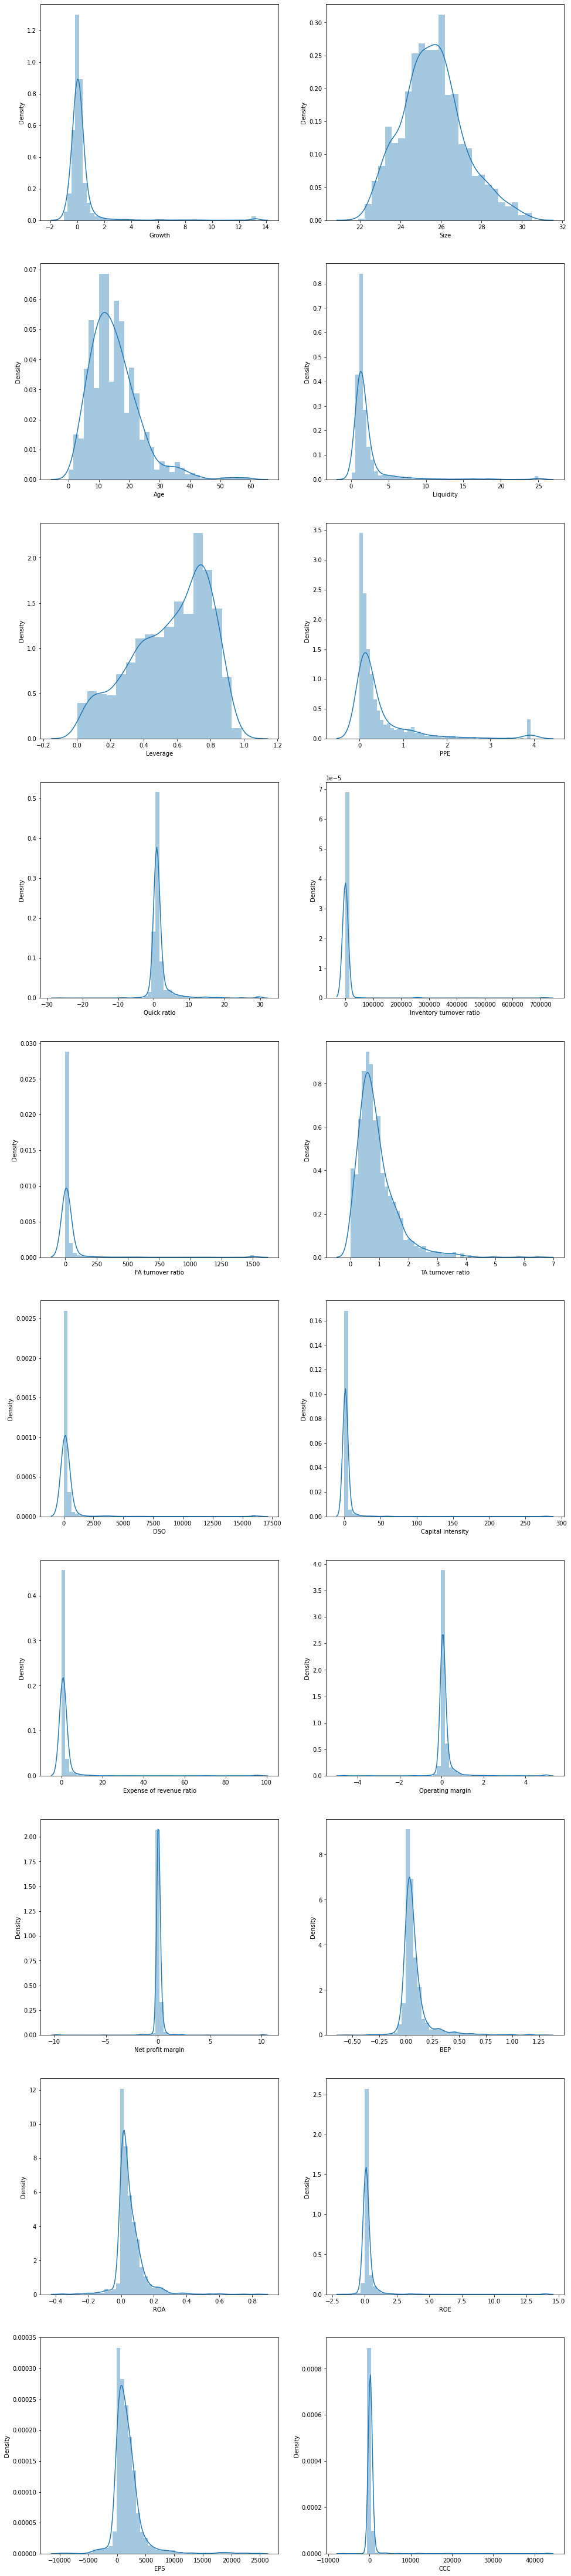

In [16]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(10,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity', 'Leverage', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'Net profit margin', 'BEP', 'ROA', 'ROE', 'EPS', 'CCC'])

In [17]:
data.shape[0]

1672

In [18]:
(data.isnull().sum()/data.shape[0]*100).sort_values(axis=0, ascending=False)

Quick ratio                 5.382775
Size                        5.263158
Net profit margin           4.485646
ROE                         4.366029
ROA                         4.366029
EPS                         4.066986
Growth                      3.887560
PPE                         3.409091
TA turnover ratio           2.930622
Capital intensity           2.930622
Operating margin            2.811005
BEP                         2.811005
Expense of revenue ratio    2.811005
Leverage                    2.811005
DSO                         2.811005
FA turnover ratio           2.811005
Liquidity                   2.811005
Inventory turnover ratio    2.631579
CCC                         2.631579
Age                         0.179426
GDP                         0.000000
CPI                         0.000000
Interest rates              0.000000
Target                      0.000000
dtype: float64

<AxesSubplot:>

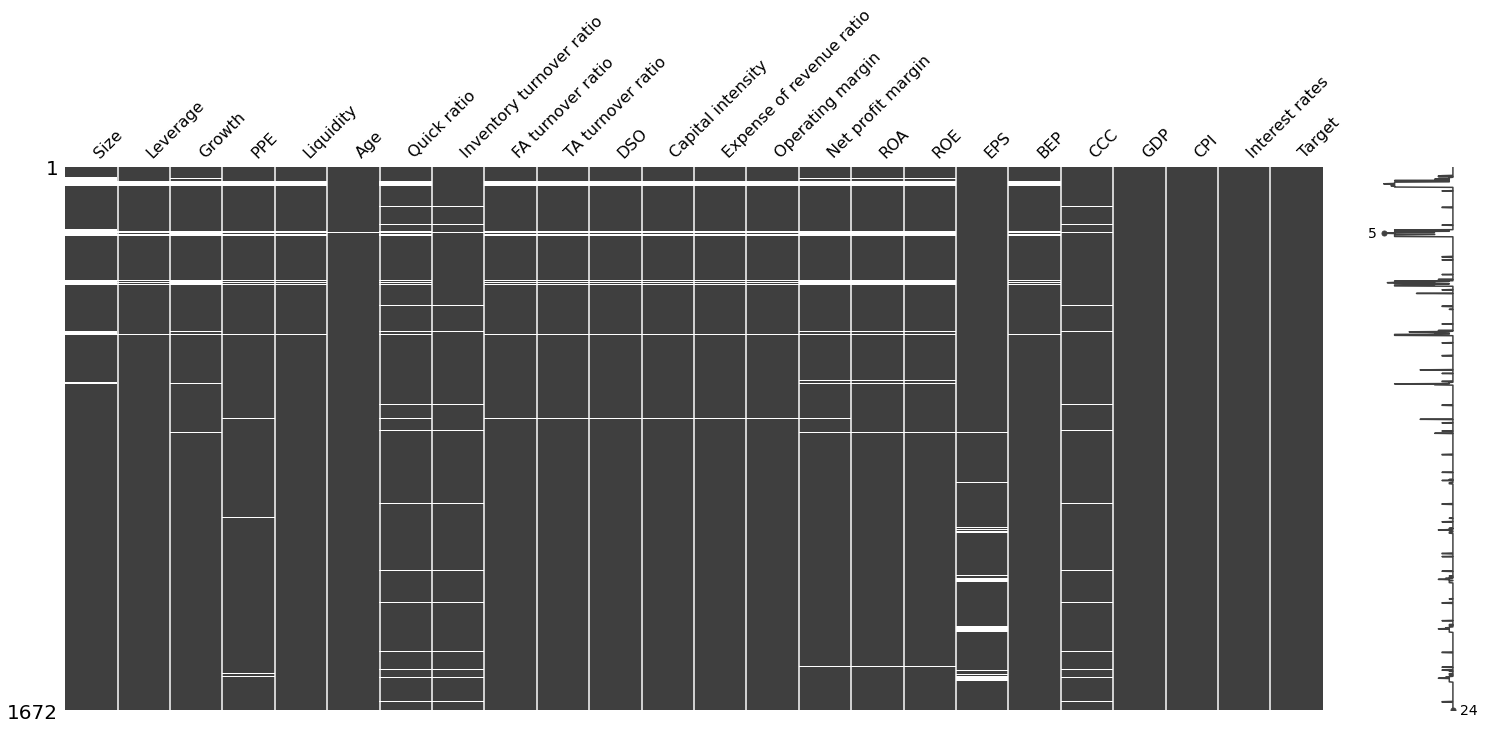

In [19]:
import missingno

missingno.matrix(data)

In [20]:
# Drop all columns that have at least 1 NaN
new_data = data.dropna(axis=0)
new_data = new_data.astype({'Age': int})
print(new_data.shape)

print(new_data.isnull().sum().sum())

(1461, 24)
0


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [22]:
from sklearn import preprocessing

X = new_data.drop('Target', axis=1)
y = new_data.Target


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [24]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    'Support Vector Machine (RBF Kernel)': SVC(),
    'Neural Network': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
  model.fit(X_train, y_train)
  print(name + ' trained.')

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.


In [25]:
for name, model in models.items():
  result = model.score(X_test, y_test)
  print(name + ': {:.2f}%'.format(result * 100))

Logistic Regression: 65.53%
K-Nearest Neighbors: 62.46%
Decision Tree: 59.39%
Support Vector Machine (Linear Kernel): 65.19%
Support Vector Machine (RBF Kernel): 65.87%
Neural Network: 65.53%
Random Forest: 65.19%


In [26]:
y_test.value_counts() / len(y_test)

1.0    0.631399
0.0    0.368601
Name: Target, dtype: float64

In [27]:
y.value_counts() / len(y)

1.0    0.604381
0.0    0.395619
Name: Target, dtype: float64

In [28]:
from sklearn.ensemble import RandomForestClassifier

optimal n_estimators value is 96 that accuracy is 0.658518397307027


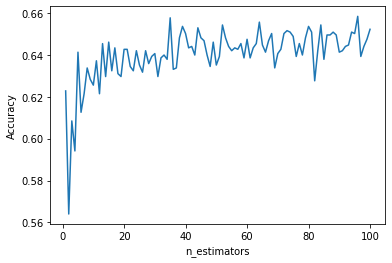

In [29]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1, 101))   # 100 trường hợp từ 1 đến 100 Decision Trees để tạo 100 Random Forest Metrics.
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']

ind = np.where(scores == np.amax(scores))[0][0]+1

print(f'optimal n_estimators value is {ind} that accuracy is {scores.max()}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

optimal n_estimators value is 96 that accuracy is 0.658518397307027


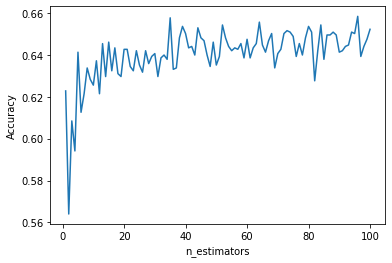

In [30]:
print(f'optimal n_estimators value is {ind} that accuracy is {max(scores)}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, accuracy_score

rf = RandomForestClassifier(n_estimators=ind, random_state=0)

In [32]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = rf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

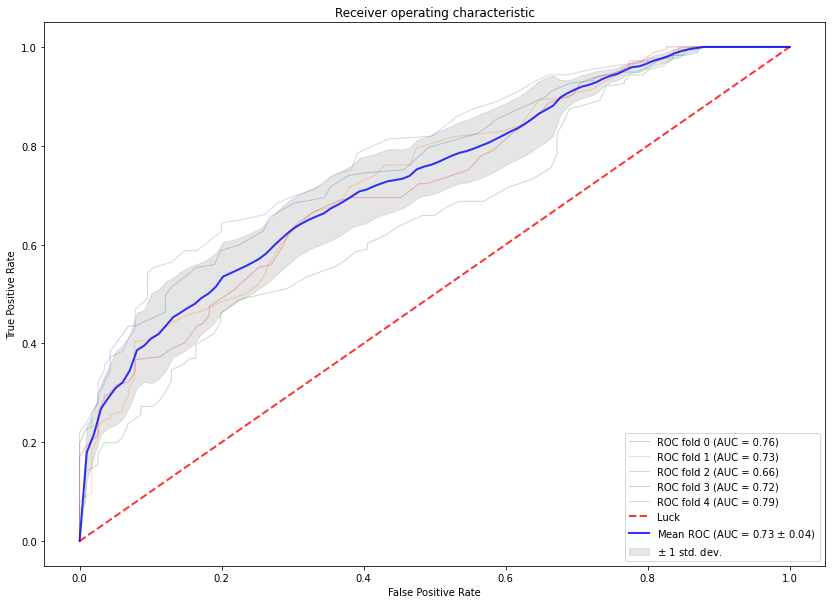

,AUC Train,AUC Test
0,1.0,0.763759
1,1.0,0.732563
2,1.0,0.659728
3,1.0,0.721665
4,1.0,0.791108


In [33]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [34]:
ft_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(ft_imp)

ROA                         0.072647
ROE                         0.063918
Net profit margin           0.060828
Leverage                    0.060736
Growth                      0.052485
DSO                         0.048419
Inventory turnover ratio    0.048219
CCC                         0.047948
PPE                         0.046805
EPS                         0.046617
FA turnover ratio           0.045715
Size                        0.042891
TA turnover ratio           0.042705
BEP                         0.042622
Capital intensity           0.041103
Quick ratio                 0.037523
Operating margin            0.037218
Expense of revenue ratio    0.037103
Liquidity                   0.036362
Age                         0.027574
CPI                         0.020769
Interest rates              0.020531
GDP                         0.019261
dtype: float64


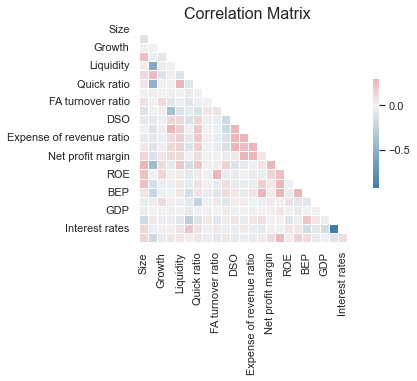

In [35]:
def plot_correlation_matrix(corr_mat):
 sns.set(style="white")
 mask = np.zeros_like(corr_mat, dtype=np.bool)
 mask[np.triu_indices_from(mask)] = True
 fig, ax = plt.subplots()
 cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
 sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5,
 cbar_kws={"shrink": .5}, ax=ax)
 ax.set_title('Correlation Matrix', fontsize=16)
 sns.set(style="darkgrid")
corr_mat = data.select_dtypes(include='number').corr()
plot_correlation_matrix(corr_mat)

y_pred = rf.predict(X_test)

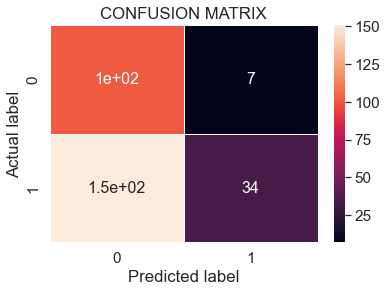

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

LABELS = [0, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, linewidths=.5, xticklabels=LABELS, yticklabels=LABELS) # font size
plt.title('CONFUSION MATRIX')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [37]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.40      0.94      0.56       108
         1.0       0.83      0.18      0.30       185

    accuracy                           0.46       293
   macro avg       0.62      0.56      0.43       293
weighted avg       0.67      0.46      0.40       293



In [38]:
y_pred

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.